In [1]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# urr_httpgetmt and curr_httpgetmt6: Download speed metrics


In [2]:
# first we explore the curr_httpgetmt
df_httpgetmt = pd.read_csv('../data/raw/curr_httpgetmt.csv')

In [3]:
df_httpgetmt.head(2)

,unit_id,dtime,target,address,fetch_time,bytes_total,bytes_sec,bytes_sec_interval,warmup_time,warmup_bytes,sequence,threads,successes,failures
0,386,2023-02-02 11:46:44,sp1-vm-newyork-us.samknows.com,151.139.31.1,10028665,257012514,25627789,25627789,5028092,122041478,0,8,1,0
1,386,2023-02-02 17:46:29,sp1-vm-newyork-us.samknows.com,151.139.31.1,10018544,255021762,25454972,25454972,1523612,33933926,0,8,1,0


In [4]:
df_httpgetmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724511 entries, 0 to 724510
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   unit_id             724511 non-null  int64 
 1   dtime               724511 non-null  object
 2   target              724511 non-null  object
 3   address             724511 non-null  object
 4   fetch_time          724511 non-null  int64 
 5   bytes_total         724511 non-null  int64 
 6   bytes_sec           724511 non-null  int64 
 7   bytes_sec_interval  724511 non-null  int64 
 8   warmup_time         724511 non-null  int64 
 9   warmup_bytes        724511 non-null  int64 
 10  sequence            724511 non-null  int64 
 11  threads             724511 non-null  int64 
 12  successes           724511 non-null  int64 
 13  failures            724511 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 77.4+ MB


### Description
`urr_httpgetmt` and `curr_httpgetmt6` are functions that measure the download speed of HTTP GET requests. They are used to assess the performance of HTTP servers by calculating the time taken to download a specified number of bytes from a given URL. The functions return the download speed in bytes per second (Bps) and can be used for both IPv4 and IPv6 addresses.

In [5]:
# second we explore the curr_httpgetmt
df_curr_httpgetmt6 = pd.read_csv('../data/raw/curr_httpgetmt6.csv')

In [6]:
df_curr_httpgetmt6.head(2)

,unit_id,dtime,target,address,fetch_time,bytes_total,bytes_sec,bytes_sec_interval,warmup_time,warmup_bytes,sequence,threads,successes,failures
0,216748,2023-02-25 02:55:46,v6-n1-fcc-losangeles-us.samknows.com,2604:6840:1600:1501::1,10489480,616088464,58733938,58733938,7983673,441679036,0,8,1,0
1,216748,2023-02-25 05:55:25,v6-n1-fcc-losangeles-us.samknows.com,2604:6840:1600:1501::1,10541189,646054608,61288590,61288590,8068534,446827962,0,8,1,0


In [7]:
df_curr_httpgetmt6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   unit_id             489 non-null    int64 
 1   dtime               489 non-null    object
 2   target              489 non-null    object
 3   address             489 non-null    object
 4   fetch_time          489 non-null    int64 
 5   bytes_total         489 non-null    int64 
 6   bytes_sec           489 non-null    int64 
 7   bytes_sec_interval  489 non-null    int64 
 8   warmup_time         489 non-null    int64 
 9   warmup_bytes        489 non-null    int64 
 10  sequence            489 non-null    int64 
 11  threads             489 non-null    int64 
 12  successes           489 non-null    int64 
 13  failures            489 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 53.6+ KB


From this data, we can find pattern in the following:

1. **Download Speed Analysis**:
    - Analyze the `bytes_sec` and `bytes_sec_interval` columns to understand the download speed trends.
    - Compare the download speeds across different `target` servers or `address`.

2. **Fetch Time Analysis**:
    - Investigate the `fetch_time` column to see how long it takes to fetch data from different servers.

3. **Warmup Performance**:
    - Analyze the `warmup_time` and `warmup_bytes` columns to understand the warmup phase's impact on performance.

4. **Server Performance**:
    - Compare the performance of different `target` servers or `address` in terms of download speed and fetch time.

5. **Success and Failure Rates**:
    - Use the `successes` and `failures` columns to calculate the success rate of HTTP GET requests.

6. **Thread Utilization**:
    - Analyze the `threads` column to see how the number of threads affects performance metrics like `bytes_sec`.

7. **Time-based Trends**:
    - Use the `dtime` column to explore time-based trends in download speed or fetch time.

8. **Correlation Analysis**:
    - Perform correlation analysis between columns like `fetch_time`, `bytes_sec`, `warmup_time`, etc., to identify relationships.ـ
    

---

### EDA For Downloading Metrices : httpgetmt - httpgetmt6

#### Converting the dtime from object to datetime for downloading metrics

In [8]:
# converting the dtime from object to datetime 
df_httpgetmt['dtime'] = pd.to_datetime(df_httpgetmt['dtime'])
df_curr_httpgetmt6['dtime'] = pd.to_datetime(df_curr_httpgetmt6['dtime'])

#### Converting the bytes from megabytes for downloading metrics

In [9]:
df_httpgetmt['mbps'] = df_httpgetmt['bytes_sec'] * 8 / 1_000_000  # Convert bytes to megabits
df_curr_httpgetmt6['mbps'] = df_curr_httpgetmt6['bytes_sec'] * 8 / 1_000_000

In [10]:
# 4. Statistical Summary
def get_stats(df, name):
    stats = {
        'Protocol': name,
        'Mean Speed (Mbps)': df['mbps'].mean(),
        'Median Speed (Mbps)': df['mbps'].median(),
        'Max Speed (Mbps)': df['mbps'].max(),
        'Min Speed (Mbps)': df['mbps'].min(),
        'Success Rate (%)': (df['successes'].sum() / (df['successes'].sum() + df['failures'].sum())) * 100,
        'Avg Fetch Time (ms)': df['fetch_time'].mean() / 1000,
        'Sample Size': len(df)
    }
    return pd.Series(stats)

download_stats_df = pd.DataFrame([
    get_stats(df_httpgetmt, 'IPv4'),
    get_stats(df_curr_httpgetmt6, 'IPv6')
])

In [11]:
download_stats_df

,Protocol,Mean Speed (Mbps),Median Speed (Mbps),Max Speed (Mbps),Min Speed (Mbps),Success Rate (%),Avg Fetch Time (ms),Sample Size
0,IPv4,270.146640,114.928240,947.812632,0.0,99.531270,10000.369815,724511
1,IPv6,660.365598,858.841512,926.874000,0.0,92.433538,9353.079106,489


#### Bar Chart: Mean and Median Download Speeds

In [12]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(
    x=download_stats_df['Protocol'],
    y=download_stats_df['Mean Speed (Mbps)'],
    name='Mean Speed (Mbps)',
    marker_color='indianred',
    text=download_stats_df['Mean Speed (Mbps)'].round(2),
    textposition='auto'
))
fig1.add_trace(go.Bar(
    x=download_stats_df['Protocol'],
    y=download_stats_df['Median Speed (Mbps)'],
    name='Median Speed (Mbps)',
    marker_color='lightseagreen',
    text=download_stats_df['Median Speed (Mbps)'].round(2),
    textposition='auto'
))

fig1.update_layout(
    title='Download Speed Comparison: Mean vs Median (IPv4 vs IPv6)',
    xaxis_title='Protocol',
    yaxis_title='Speed (Mbps)',
    barmode='group',
    height=500,
    width=800,
    legend_title='Metric',
    template='plotly_white'
)

# fig1.write_html("../reports/viz/download_performance/download_speed_comparison.html")

####  Bar Chart: Success Rate and Average Fetch Time for Downloading Metrics


In [13]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
# Bar chart for Success Rate (%) on primary Y-axis
fig2.add_trace(
    go.Bar(
        x=download_stats_df['Protocol'],
        y=download_stats_df['Success Rate (%)'],
        name='Success Rate (%)',
        marker_color='indianred',
        text=download_stats_df['Success Rate (%)'].round(2),
        textposition='auto'
    ),
    secondary_y=False
)

# Line chart with markers for Avg Fetch Time (ms) on secondary Y-axis
fig2.add_trace(
    go.Scatter(
        x=download_stats_df['Protocol'],
        y=download_stats_df['Avg Fetch Time (ms)'],
        name='Avg Fetch Time (ms)',
        mode='lines+markers+text',
        marker=dict(color='lightseagreen', size=10),
        line=dict(color='lightseagreen', width=2),
        text=download_stats_df['Avg Fetch Time (ms)'].round(2),
        textposition='top center'
    ),
    secondary_y=True
)

# Update layout for clarity
fig2.update_layout(
    title='Success Rate vs Average Fetch Time (IPv4 vs IPv6)',
    xaxis_title='Protocol',
    height=500,
    width=800,
    template='plotly_white',
    legend_title='Metric',
    barmode='group'  # Only affects bars, not the line
)

fig2.update_yaxes(title_text='Success Rate (%)', secondary_y=False, range=[90, 100])  # Adjusted range for better visibility
fig2.update_yaxes(title_text='Avg Fetch Time (ms)', secondary_y=True, range=[9000, 10500])  # Adjusted range

# fig2.write_html("../reports/viz/download_performance/success_fetch_comparison_corrected.html")



#### Average Download Speed by Target Server for Downloading Metrics

In [14]:
# 2. Average Download Speed by Target Server
download_ipv4_server_stats = df_httpgetmt.groupby('target')['mbps'].agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=True)
download_ipv6_server_stats = df_curr_httpgetmt6.groupby('target')['mbps'].agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=True)

In [15]:

fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x=download_ipv4_server_stats['target'],
    y=download_ipv4_server_stats['mean'],
    name='IPv4',
    text=download_ipv4_server_stats['count'],
    textposition='auto'
))
fig2.add_trace(go.Bar(
    x=download_ipv6_server_stats['target'],
    y=download_ipv6_server_stats['mean'],
    name='IPv6',
    text=download_ipv6_server_stats['count'],
    textposition='auto'
))

fig2.update_layout(
    title='Average Download Speed by Server Sorted Ascending',
    xaxis_title='Target Server',
    yaxis_title='Average Speed (Mbps)',
    barmode='group',
    height=600,
    width=1000
)
# fig2.write_html("../reports/viz/download_performance/Average Downlaod Speed by Server Sorted Ascending.html")


####  Perfomance Download Speed Trend Over Time (IPv4 vs IPv6 comparison)


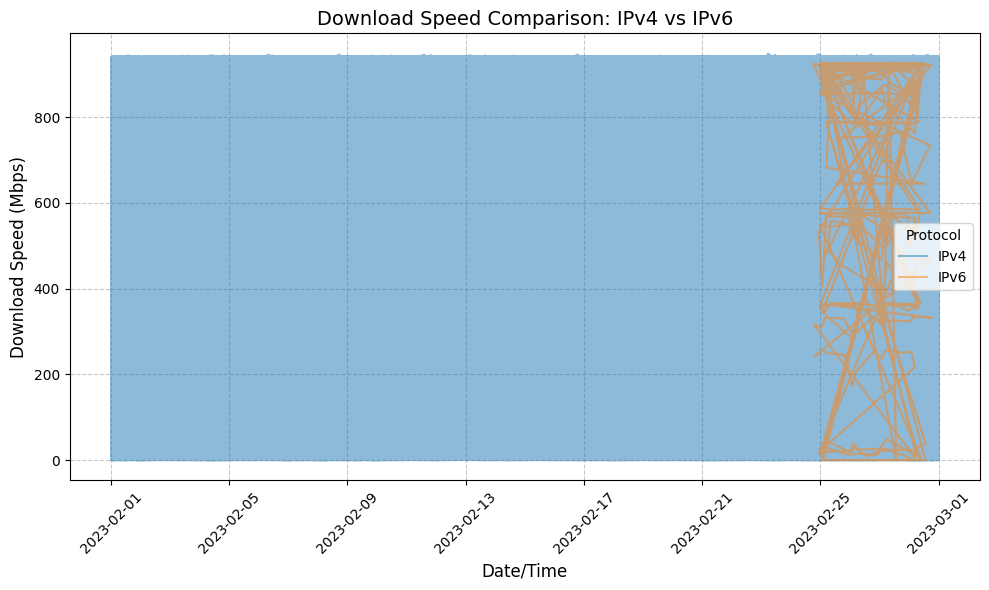

In [16]:

plt.figure(figsize=(10, 6)) 

# Plot IPv4 data
plt.plot(df_httpgetmt['dtime'], df_httpgetmt['mbps'], 
         label='IPv4', 
         alpha=0.5)  # opacity=0.5 in Plotly is alpha=0.5 in Matplotlib

# Plot IPv6 data
plt.plot(df_curr_httpgetmt6['dtime'], df_curr_httpgetmt6['mbps'], 
         label='IPv6', 
         alpha=0.5)

# Customize the plot
plt.title("Download Speed Comparison: IPv4 vs IPv6", fontsize=14)
plt.xlabel("Date/Time", fontsize=12)
plt.ylabel("Download Speed (Mbps)", fontsize=12)
plt.legend(title="Protocol")  # Add legend with a title
plt.grid(True, linestyle='--', alpha=0.7)  # Optional: adds a grid for better readability

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# plt.savefig("../reports/viz/download_performance/download_speed_trend.png", dpi=100, bbox_inches='tight')

- after i see this download speed comprison i founded that all the above analysis is not really accurate because it's not in the same time period
- so i will try to find the time period for each of them and then i will compare them
- i will use the dtime column to find the time period for each of them

In [17]:
# # Filter the dataframes to include only rows where 'dtime' is between 24-02 and 28-02
# start_date = '2023-02-24'
# end_date = '2023-02-28'

# df_httpgetmt = df_httpgetmt[(df_httpgetmt['dtime'] >= start_date) & (df_httpgetmt['dtime'] <= end_date)]
# df_curr_httpgetmt6 = df_curr_httpgetmt6[(df_curr_httpgetmt6['dtime'] >= start_date) & (df_curr_httpgetmt6['dtime'] <= end_date)]

---

### Comparison of `urr_httpgetmt` and `curr_httpgetmt6`

From the descriptions of the two datasets, here are the key observations and comparisons:

1. **Purpose**:
    - Both datasets measure the performance of HTTP GET requests.
    - `urr_httpgetmt` focuses on general HTTP GET performance, while `curr_httpgetmt6` specifically targets IPv6-based HTTP GET requests.

2. **Target Servers**:
    - Both datasets include a `target` column that identifies the server being tested. However, `curr_httpgetmt6` focuses on IPv6 servers, as indicated by the `address` column containing IPv6 addresses.

3. **Performance Metrics**:
    - Both datasets provide similar performance metrics, such as:
      - `fetch_time`: Time taken to fetch data.
      - `bytes_sec` and `bytes_sec_interval`: Download speeds.
      - `warmup_time` and `warmup_bytes`: Metrics for the warmup phase.
    - These metrics allow for a detailed analysis of download speeds, latency, and connection setup times.

4. **Thread Utilization**:
    - Both datasets include a `threads` column, which indicates the level of parallelism used during the HTTP GET requests.

5. **Success and Failure Rates**:
    - Both datasets track the number of successful (`successes`) and failed (`failures`) HTTP GET requests, enabling reliability analysis.

6. **Time-based Trends**:
    - The `dtime` column in both datasets allows for time-based trend analysis of performance metrics.

7. **Differences**:
    - The primary difference lies in the focus of the datasets:
      - `curr_httpgetmt` includes both IPv4 and IPv6 data.
      - `curr_httpgetmt6` is exclusively for IPv6 performance analysis.

### Insights:
- The datasets are complementary and can be used together to compare IPv4 and IPv6 performance.
- `urr_httpgetmt` provides a broader view of HTTP GET performance, while `curr_httpgetmt6` offers a focused analysis of IPv6-specific performance.
- By analyzing both datasets, you can identify trends, bottlenecks, and areas for optimization in HTTP GET performance across different protocols and server configurations.

-----

# curr_httppostmt and curr_httppostmt6: Upload speed metrics



In [18]:
df_httppostmt = pd.read_csv('../data/raw/curr_httppostmt.csv')

In [19]:
df_httppostmt.head(2)

,unit_id,dtime,target,address,fetch_time,bytes_total,bytes_sec,bytes_sec_interval,warmup_time,warmup_bytes,sequence,threads,successes,failures
0,386,2023-02-02 01:51:29,sp1-vm-newyork-us.samknows.com,151.139.31.1,10000049,181888570,18188768,18188768,1500026,24164586,0,8,1,0
1,386,2023-02-02 11:47:11,sp1-vm-newyork-us.samknows.com,151.139.31.1,10000030,184537036,18453648,18453648,5000020,86765796,0,8,1,0


In [20]:
df_httppostmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722118 entries, 0 to 722117
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   unit_id             722118 non-null  int64 
 1   dtime               722118 non-null  object
 2   target              722118 non-null  object
 3   address             722118 non-null  object
 4   fetch_time          722118 non-null  int64 
 5   bytes_total         722118 non-null  int64 
 6   bytes_sec           722118 non-null  int64 
 7   bytes_sec_interval  722118 non-null  int64 
 8   warmup_time         722118 non-null  int64 
 9   warmup_bytes        722118 non-null  int64 
 10  sequence            722118 non-null  int64 
 11  threads             722118 non-null  int64 
 12  successes           722118 non-null  int64 
 13  failures            722118 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 77.1+ MB


In [21]:
df_httppostmt6 = pd.read_csv('../data/raw/curr_httppostmt6.csv')

In [22]:
df_httppostmt6.head(2)

,unit_id,dtime,target,address,fetch_time,bytes_total,bytes_sec,bytes_sec_interval,warmup_time,warmup_bytes,sequence,threads,successes,failures
0,26419,2023-02-28 21:49:55,v6-n1-fcc-ashburn-us.samknows.com,2604:6840:1300:1501::24,10000123,25003274,2500297,2500297,5000056,12327382,0,8,1,0
1,26419,2023-02-28 21:50:23,v6-n1-fcc-ashburn-us.samknows.com,2604:6840:1300:1501::24,10000052,25013690,2501356,2501356,5000145,12339388,0,8,1,0


In [23]:
df_httppostmt6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   unit_id             1159 non-null   int64 
 1   dtime               1159 non-null   object
 2   target              1159 non-null   object
 3   address             1159 non-null   object
 4   fetch_time          1159 non-null   int64 
 5   bytes_total         1159 non-null   int64 
 6   bytes_sec           1159 non-null   int64 
 7   bytes_sec_interval  1159 non-null   int64 
 8   warmup_time         1159 non-null   int64 
 9   warmup_bytes        1159 non-null   int64 
 10  sequence            1159 non-null   int64 
 11  threads             1159 non-null   int64 
 12  successes           1159 non-null   int64 
 13  failures            1159 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 126.9+ KB


### EDA For Uploading Metrices : httppostmt - httppostmt6

#### Converting the dtime from object to datetime for uploading metrics

In [24]:
# converting the dtime from object to datetime 
df_httppostmt['dtime'] = pd.to_datetime(df_httppostmt['dtime'])
df_httppostmt6['dtime'] = pd.to_datetime(df_httppostmt6['dtime'])

#### Converting the bytes from megabytes for uploading metrics

In [25]:
df_httppostmt['mbps'] = df_httppostmt['bytes_sec'] * 8 / 1_000_000  # Convert bytes to megabits
df_httppostmt6['mbps'] = df_httppostmt6['bytes_sec'] * 8 / 1_000_000

In [26]:
upload_stats_df = pd.DataFrame([
    get_stats(df_httppostmt, 'IPv4'),
    get_stats(df_httppostmt6, 'IPv6')
])

In [27]:
upload_stats_df

,Protocol,Mean Speed (Mbps),Median Speed (Mbps),Max Speed (Mbps),Min Speed (Mbps),Success Rate (%),Avg Fetch Time (ms),Sample Size
0,IPv4,116.918714,17.350792,951.260736,0.0,99.190576,9944.071053,722118
1,IPv6,167.991458,22.735136,923.062496,0.0,91.975841,9214.906734,1159


#### Bar Chart: Mean and Median Upload Speeds

In [28]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(
    x=upload_stats_df['Protocol'],
    y=upload_stats_df['Mean Speed (Mbps)'],
    name='Mean Speed (Mbps)',
    marker_color='indianred',
    text=upload_stats_df['Mean Speed (Mbps)'].round(2),
    textposition='auto'
))
fig1.add_trace(go.Bar(
    x=upload_stats_df['Protocol'],
    y=upload_stats_df['Median Speed (Mbps)'],
    name='Median Speed (Mbps)',
    marker_color='lightseagreen',
    text=upload_stats_df['Median Speed (Mbps)'].round(2),
    textposition='auto'
))

fig1.update_layout(
    title='Upload Speed Comparison: Mean vs Median (IPv4 vs IPv6)',
    xaxis_title='Protocol',
    yaxis_title='Speed (Mbps)',
    barmode='group',
    height=500,
    width=800,
    legend_title='Metric',
    template='plotly_white'
)
# fig1.write_html("../reports/viz/upload_performance/upload_speed_comparison.html")

####  Bar Chart: Success Rate and Average Fetch Time for Uploading Metrics

In [29]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
# Bar chart for Success Rate (%) on primary Y-axis
fig2.add_trace(
    go.Bar(
        x=upload_stats_df['Protocol'],
        y=upload_stats_df['Success Rate (%)'],
        name='Success Rate (%)',
        marker_color='indianred',
        text=upload_stats_df['Success Rate (%)'].round(2),
        textposition='auto'
    ),
    secondary_y=False
)

# Line chart with markers for Avg Fetch Time (ms) on secondary Y-axis
fig2.add_trace(
    go.Scatter(
        x=upload_stats_df['Protocol'],
        y=upload_stats_df['Avg Fetch Time (ms)'],
        name='Avg Fetch Time (ms)',
        mode='lines+markers+text',
        marker=dict(color='lightseagreen', size=10),
        line=dict(color='lightseagreen', width=2),
        text=upload_stats_df['Avg Fetch Time (ms)'].round(2),
        textposition='top center'
    ),
    secondary_y=True
)

# Update layout for clarity
fig2.update_layout(
    title='Success Rate vs Average Fetch Time (IPv4 vs IPv6)',
    xaxis_title='Protocol',
    height=500,
    width=800,
    template='plotly_white',
    legend_title='Metric',
    barmode='group'  # Only affects bars, not the line
)

fig2.update_yaxes(title_text='Success Rate (%)', secondary_y=False, range=[90, 100])  # Adjusted range for better visibility
fig2.update_yaxes(title_text='Avg Fetch Time (ms)', secondary_y=True, range=[9000, 10500])  # Adjusted range

# fig2.write_html("../reports/viz/upload_performance/success_fetch_comparison_corrected.html")


#### Average Uploading Speed by Target Server

In [30]:
upload_ipv4_server_stats = df_httppostmt.groupby('target')['mbps'].agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=True)
upload_ipv6_server_stats = df_httppostmt6.groupby('target')['mbps'].agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=True)

In [31]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x=upload_ipv4_server_stats['target'],
    y=upload_ipv4_server_stats['mean'],
    name='IPv4',
    text=upload_ipv4_server_stats['count'],
    textposition='auto'
))
fig2.add_trace(go.Bar(
    x=upload_ipv6_server_stats['target'],
    y=upload_ipv6_server_stats['mean'],
    name='IPv6',
    text=upload_ipv6_server_stats['count'],
    textposition='auto'
))

fig2.update_layout(
    title='Average Upload Speed by Server Sorted Ascending',
    xaxis_title='Target Server',
    yaxis_title='Average Speed (Mbps)',
    barmode='group',
    height=600,
    width=1000
)

# fig2.write_html("../reports/viz/upload_performance/Average Upload Speed by Server Sorted Ascending.html")


####  Perfomance Upload Speed Trend Over Time (IPv4 vs IPv6 comparison)


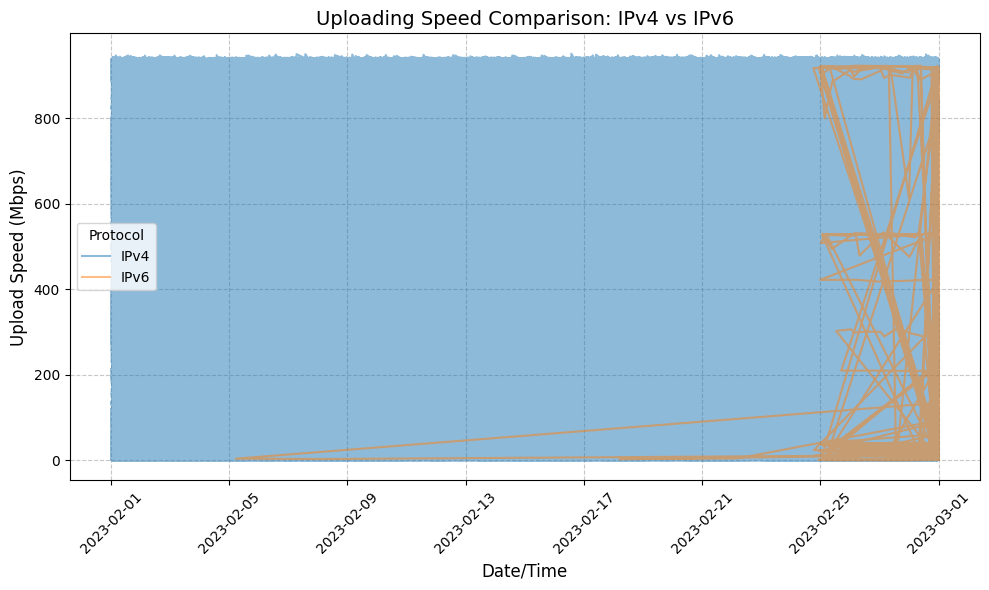

In [32]:

plt.figure(figsize=(10, 6)) 

# Plot IPv4 data
plt.plot(df_httppostmt['dtime'], df_httppostmt['mbps'], 
         label='IPv4', 
         alpha=0.5)  # opacity=0.5 in Plotly is alpha=0.5 in Matplotlib

# Plot IPv6 data
plt.plot(df_httppostmt6['dtime'], df_httppostmt6['mbps'], 
         label='IPv6', 
         alpha=0.5)

# Customize the plot
plt.title("Uploading Speed Comparison: IPv4 vs IPv6", fontsize=14)
plt.xlabel("Date/Time", fontsize=12)
plt.ylabel("Upload Speed (Mbps)", fontsize=12)
plt.legend(title="Protocol")  # Add legend with a title
plt.grid(True, linestyle='--', alpha=0.7)  # Optional: adds a grid for better readability

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# plt.savefig("../reports/viz/upload_performance/upload_speed_trend.png", dpi=100, bbox_inches='tight')

#### curr_httppostmt.csv and curr_httppostmt6.csv

The datasets `curr_httppostmt.csv` and `curr_httppostmt6.csv` represent performance metrics for HTTP POST requests, focusing on upload speeds. Here's a comparison and description of these datasets:

1. **Purpose**:
        - Both datasets measure the performance of HTTP POST requests.
        - `curr_httppostmt.csv` focuses on general HTTP POST performance, while `curr_httppostmt6.csv` specifically targets IPv6-based HTTP POST requests.

### Insights:
- The datasets are complementary and can be used together to compare IPv4 and IPv6 performance for HTTP POST requests.
- `curr_httppostmt.csv` provides a broader view of HTTP POST performance, while `curr_httppostmt6.csv` offers a focused analysis of IPv6-specific performance.
- By analyzing both datasets, you can identify trends, bottlenecks, and areas for optimization in HTTP POST performance across different protocols and server configurations.


---

# curr_udplatency and curr_udplatency6: Network latency

In [33]:
df_udplatency = pd.read_csv('../data/raw/curr_udplatency.csv')
df_udplatency.head(2)

,unit_id,dtime,target,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failures
0,386,2023-02-01 00:32:53,newyorkfcc.west.verizon.net,8448,7380,7380,1599,17,0
1,386,2023-02-01 00:32:53,sp1-vm-newyork-us.samknows.com,7936,7143,7143,1539,17,0


In [34]:
df_udplatency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852353 entries, 0 to 4852352
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   unit_id    int64 
 1   dtime      object
 2   target     object
 3   rtt_avg    int64 
 4   rtt_min    int64 
 5   rtt_max    int64 
 6   rtt_std    int64 
 7   successes  int64 
 8   failures   int64 
dtypes: int64(7), object(2)
memory usage: 333.2+ MB


In [35]:
df_udplatency6 = pd.read_csv('../data/raw/curr_udplatency6.csv')
df_udplatency6.head(2)

,unit_id,dtime,target,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failures
0,26419,2023-02-28 19:47:56,v6-n1-fcc-ashburn-us.samknows.com,27674,26937,30633,376,2269,6
1,26419,2023-02-28 20:47:55,v6-n1-fcc-ashburn-us.samknows.com,27635,27033,28628,252,2340,0


In [36]:
df_udplatency6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24790 entries, 0 to 24789
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   unit_id    24790 non-null  int64 
 1   dtime      24790 non-null  object
 2   target     24790 non-null  object
 3   rtt_avg    24790 non-null  int64 
 4   rtt_min    24790 non-null  int64 
 5   rtt_max    24790 non-null  int64 
 6   rtt_std    24790 non-null  int64 
 7   successes  24790 non-null  int64 
 8   failures   24790 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.7+ MB


### Overview of UDP Latency Datasets
 
 The UDP latency datasets (`curr_udplatency.csv` and `curr_udplatency6.csv`) contain network latency measurements using UDP protocol for IPv4 and IPv6 respectively.
 
 ### Common Fields:
 1. **Identification**:
     - `unit_id`: Unique identifier for the testing unit
     - `dtime`: Timestamp of the measurement
     - `target`: Target server for latency testing
 
 2. **Latency Metrics**:
     - `rtt_avg`: Average round-trip time in milliseconds
     - `rtt_min`: Minimum round-trip time observed
     - `rtt_max`: Maximum round-trip time observed
     - `rtt_std`: Standard deviation of round-trip times
 
 3. **Success Metrics**:
     - `successes`: Number of successful UDP packets
     - `failures`: Number of failed UDP packets
 
 ### Key Differences:
 - `curr_udplatency.csv` uses IPv4 addresses (e.g., "151.139.31.1")
 - `curr_udplatency6.csv` uses IPv6 addresses (e.g., "2604:6840:1300:1501::24")
 
 ### Insights:
 - These datasets enable analysis of network latency characteristics across both IPv4 and IPv6 protocols
 - The metrics allow for detailed assessment of network performance, jitter, and reliability
 - The success/failure counts help identify connection stability issues

----

# curr_udpjitter: Connection stability

In [37]:
pd_udpjitter = pd.read_csv('../data/raw/curr_udpjitter.csv')

In [38]:
pd_udpjitter.head(2)

,unit_id,dtime,target,packet_size,stream_rate,duration,packets_up_sent,packets_down_sent,packets_up_recv,packets_down_recv,jitter_up,jitter_down,latency,successes,failures
0,386,2023-02-01 09:41:39,sp2-vm-newyork-us.samknows.com,160,64000,15102528,500,500,500,500,1268,720,7108,1,0
1,386,2023-02-01 17:41:44,sp1-vm-newyork-us.samknows.com,160,64000,15008716,500,500,500,500,1100,727,7902,1,0


In [39]:
pd_udpjitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394623 entries, 0 to 2394622
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   unit_id            int64 
 1   dtime              object
 2   target             object
 3   packet_size        int64 
 4   stream_rate        int64 
 5   duration           int64 
 6   packets_up_sent    int64 
 7   packets_down_sent  int64 
 8   packets_up_recv    int64 
 9   packets_down_recv  int64 
 10  jitter_up          int64 
 11  jitter_down        int64 
 12  latency            int64 
 13  successes          int64 
 14  failures           int64 
dtypes: int64(13), object(2)
memory usage: 274.0+ MB


The UDP jitter datasets (`curr_udpjitter.csv` and `curr_udpjitter6.csv`) measure connection stability using UDP protocol.

### Key Fields:
1. **Test Parameters**:
   - `packet_size`: Size of UDP packets used in testing
   - `stream_rate`: Rate of packet transmission
   - `duration`: Total test duration

2. **Packet Statistics**:
   - `packets_up_sent/recv`: Packets sent/received upstream
   - `packets_down_sent/recv`: Packets sent/received downstream

3. **Performance Metrics**:
    - `jitter_up`: Upstream jitter (variation in delay)
    - `jitter_down`: Downstream jitter
    - `latency`: Network latency measurement

### Insights:
- Jitter measurements help assess connection stability and quality
- Packet loss rates indicate network reliability
- Combined metrics provide comprehensive view of connection performance


----

# curr_udpcloss: Packet Loss 

In [40]:
df_curr_udpcloss = pd.read_csv('../data/raw/curr_udpcloss.csv')

In [41]:
df_curr_udpcloss.head(2)

,unit_id,dtime,duration,target,address,packets
0,386,2023-02-11 22:09:45,4500098,sp2-vm-newyork-us.samknows.com,151.139.31.8,2
1,390,2023-02-05 01:25:59,4499578,sp1-vm-newyork-us.samknows.com,151.139.31.1,2


In [42]:
df_curr_udpcloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752766 entries, 0 to 1752765
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   unit_id   int64 
 1   dtime     object
 2   duration  int64 
 3   target    object
 4   address   object
 5   packets   int64 
dtypes: int64(3), object(3)
memory usage: 80.2+ MB


The dataset provides information about packet loss during network testing. Here's a breakdown of the key fields:

### Key Fields:
1. **Identification**:
    - `unit_id`: Unique identifier for the testing unit.
    - `dtime`: Timestamp of the measurement.

2. **Test Parameters**:
    - `duration`: Duration of the test in milliseconds.
    - `target`: Target server for the test (e.g., `sp2-vm-newyork-us.samknows.com`).
    - `address`: IP address of the target server (e.g., `151.139.31.8`).

3. **Packet Statistics**:
    - `packets`: Number of packets involved in the test.

This dataset can be used to analyze packet loss trends, identify network reliability issues, and assess the performance of specific servers or network paths.

----

#  curr_dns: DNS resolution performance



In [43]:
df_dns = pd.read_csv('../data/raw/curr_dns.csv')

/var/folders/3z/w_2xtxjs7517xwd76c815h5c0000gn/T/ipykernel_15192/2717031790.py:1: DtypeWarning:

Columns (0,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.



In [44]:
df_dns.head(2)

,unit_id,dtime,nameserver,lookup_host,response_ip,rtt,successes,failures
0,386,2023-02-01 00:44:55,71.243.0.12,www.yahoo.com,74.6.143.25,3723,1,0
1,386,2023-02-01 03:44:08,71.243.0.12,www.amazon.com,18.161.31.236,3715,1,0


In [45]:
df_dns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115514488 entries, 0 to 115514487
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   unit_id      object
 1   dtime        object
 2   nameserver   object
 3   lookup_host  object
 4   response_ip  object
 5   rtt          object
 6   successes    object
 7   failures     object
dtypes: object(8)
memory usage: 6.9+ GB


The DNS resolution dataset (`curr_dns.csv`) measures DNS lookup performance.
 
 ### Key Fields:
 1. **DNS Query Details**:
    - `nameserver`: DNS server used for resolution (e.g., 71.243.0.12)
    - `lookup_host`: Domain name being resolved (e.g., www.yahoo.com, www.amazon.com)
    - `response_ip`: IP address returned from DNS query
 
 2. **Performance Metrics**:
    - `rtt`: Round-trip time for DNS resolution (in milliseconds)
    - `successes`: Number of successful DNS queries
    - `failures`: Number of failed DNS queries
 
 ### Insights:
 - DNS resolution times around 3.7 seconds for sample queries
 - Successful resolutions with no failures observed in sample data
 - Same nameserver used across queries suggesting consistent DNS infrastructure


----

# curr_ping (Basic connectivity)

In [46]:
df_ping = pd.read_csv('../data/raw/curr_ping.csv')

In [47]:
df_ping.head()

,unit_id,dtime,target,rtt_avg,rtt_min,rtt_max,rtt_std,successes,failures
0,386,2023-02-01 09:44:52,sp2-vm-newyork-us.samknows.com,7123,7050,7190,57,5,0
1,386,2023-02-01 18:44:07,sp1-vm-newyork-us.samknows.com,7506,7126,8167,470,5,0
2,386,2023-02-01 19:43:56,sp1-vm-newyork-us.samknows.com,8517,7877,9094,503,5,0
3,386,2023-02-02 00:43:25,sp1-vm-newyork-us.samknows.com,8452,8070,8968,341,5,0
4,386,2023-02-02 01:44:56,sp1-vm-newyork-us.samknows.com,8424,7921,9050,544,5,0


In [48]:
df_ping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4031386 entries, 0 to 4031385
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   unit_id    int64 
 1   dtime      object
 2   target     object
 3   rtt_avg    int64 
 4   rtt_min    int64 
 5   rtt_max    int64 
 6   rtt_std    int64 
 7   successes  int64 
 8   failures   int64 
dtypes: int64(7), object(2)
memory usage: 276.8+ MB


The `df_ping` dataset contains information about basic connectivity tests using the `ping` command. It provides details about round-trip times (RTT) and the success or failure of ping requests to various targets.

#### Key Fields:
1. **Identification**:
    - `unit_id`: Unique identifier for the testing unit.
    - `dtime`: Timestamp of the measurement.

2. **Target Details**:
    - `target`: The server or endpoint being pinged (e.g., `sp2-vm-newyork-us.samknows.com`).

3. **Round-Trip Time (RTT) Metrics**:
    - `rtt_avg`: Average round-trip time in milliseconds.
    - `rtt_min`: Minimum round-trip time observed.
    - `rtt_max`: Maximum round-trip time observed.
    - `rtt_std`: Standard deviation of round-trip times, indicating variability.

4. **Success and Failure Metrics**:
    - `successes`: Number of successful ping requests.
    - `failures`: Number of failed ping requests.

#### Example Insights:
- The dataset shows RTT metrics for various targets, allowing analysis of network latency and stability.
- Variability in RTT can be assessed using the `rtt_std` column.
- Success and failure counts provide insights into the reliability of the network connection.

----

# curr_traceroute (Network path analysis)

In [49]:
df_traceroute = pd.read_csv('../data/raw/curr_traceroute.csv')

In [50]:
df_traceroute.head(2)

,unit_id,dtime,target,address,protocol,hop,hop_address,hop_name,sent,received,rtt_avg,successes,failures
0,386,2023-02-01 18:02:23,sp1-vm-newyork-us.samknows.com,151.139.31.1,UDP,19,NaN,NaN,3,0,0,1,0
1,386,2023-02-01 18:02:23,sp1-vm-newyork-us.samknows.com,151.139.31.1,UDP,28,NaN,NaN,3,0,0,1,0


In [51]:
df_traceroute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11742111 entries, 0 to 11742110
Data columns (total 13 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   unit_id      int64 
 1   dtime        object
 2   target       object
 3   address      object
 4   protocol     object
 5   hop          int64 
 6   hop_address  object
 7   hop_name     object
 8   sent         int64 
 9   received     int64 
 10  rtt_avg      int64 
 11  successes    int64 
 12  failures     int64 
dtypes: int64(7), object(6)
memory usage: 1.1+ GB


This dataset represents traceroute measurements, which analyze the network path between a source and a target server. Each row corresponds to a single hop in the traceroute process, providing details about the network path and performance metrics.

### Key Fields:
1. **Identification**:
    - `unit_id`: Unique identifier for the testing unit.
    - `dtime`: Timestamp of the traceroute measurement.

2. **Target Details**:
    - `target`: The server being traced (e.g., `sp1-vm-newyork-us.samknows.com`).
    - `address`: IP address of the target server.

3. **Protocol**:
    - `protocol`: The protocol used for the traceroute (e.g., `UDP`).

4. **Hop Details**:
    - `hop`: The hop number in the traceroute path.
    - `hop_address`: IP address of the intermediate hop (if available).
    - `hop_name`: Hostname of the intermediate hop (if available).

5. **Packet Statistics**:
    - `sent`: Number of packets sent to the hop.
    - `received`: Number of packets received from the hop.

6. **Performance Metrics**:
    - `rtt_avg`: Average round-trip time (RTT) to the hop (in milliseconds).
    - `successes`: Number of successful responses from the hop.
    - `failures`: Number of failed responses from the hop.

### Insights:
- This dataset helps analyze the network path to the target server, identifying intermediate hops and their performance.
- Missing values in `hop_address` or `hop_name` indicate that the hop did not respond or is unreachable.
- RTT metrics provide insights into latency at each hop, helping identify potential bottlenecks or delays in the network path.

---

# curr_datausage (Overall data consumption)

In [52]:
df_datausage = pd.read_csv('../data/raw/curr_datausage.csv')

In [53]:
df_datausage.head(2)

,unit_id,dtime,sk_tx_bytes,sk_rx_bytes,cust_wired_tx_bytes,cust_wired_rx_bytes,cust_wifi_tx_bytes,cust_wifi_rx_bytes
0,386,2023-02-01 06:31:55,9924,45118,43571037,1004149200,0,2790428
1,386,2023-02-01 07:31:58,0,47611,43603075,819232115,0,2739453


In [54]:
df_datausage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473200 entries, 0 to 2473199
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   unit_id              int64 
 1   dtime                object
 2   sk_tx_bytes          int64 
 3   sk_rx_bytes          int64 
 4   cust_wired_tx_bytes  int64 
 5   cust_wired_rx_bytes  int64 
 6   cust_wifi_tx_bytes   int64 
 7   cust_wifi_rx_bytes   int64 
dtypes: int64(7), object(1)
memory usage: 151.0+ MB


The dataset represents data usage metrics, capturing information about transmitted and received bytes over different network interfaces. Here's a description of the key fields:

### Key Fields:
 - `unit_id` : Unique identifier for the testing unit.

 - `dtime`: Timestamp of the measurement.

 - `sk_tx_bytes`: Bytes transmitted by the SamKnows device.

 - `sk_rx_bytes`: Bytes received by the SamKnows device.

 - `cust_wired_tx_bytes`: Bytes transmitted over the customer's wired network.

 - `cust_wired_rx_bytes`: Bytes received over the customer's wired network.

 - `cust_wifi_tx_bytes`: Bytes transmitted over the customer's Wi-Fi network.
 
 - `cust_wifi_rx_bytes`: Bytes received over the customer's Wi-Fi network.

### Insights:
- The dataset provides a breakdown of data usage across wired and wireless networks.
- It can be used to analyze network traffic patterns, identify usage trends, and compare wired vs. Wi-Fi data consumption.